In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp

In [2]:
df = pd.read_csv('data/mergeddata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 23 columns):
Unnamed: 0                  1360 non-null int64
alias                       1360 non-null object
categories                  1360 non-null object
coordinates                 1360 non-null object
is_closed                   1360 non-null bool
location                    1360 non-null object
name                        1360 non-null object
rating                      1360 non-null float64
review_count                1360 non-null int64
transactions                1360 non-null object
url                         1360 non-null object
permanently closed          1360 non-null int64
outdoor_seating             1360 non-null int64
price_cat                   1360 non-null object
delivery                    1360 non-null int64
restaurant_reservation      1360 non-null int64
pickup                      1360 non-null int64
zip_code                    1360 non-null int64
latitude            

In [4]:
df.columns

Index(['Unnamed: 0', 'alias', 'categories', 'coordinates', 'is_closed',
       'location', 'name', 'rating', 'review_count', 'transactions', 'url',
       'permanently closed', 'outdoor_seating', 'price_cat', 'delivery',
       'restaurant_reservation', 'pickup', 'zip_code', 'latitude', 'longitude',
       'total_restaurants_in_zip', 'Population Density', 'distance_to_subway'],
      dtype='object')

### Distribution of closures

In [5]:
df['permanently closed'].value_counts()

0    1173
1     187
Name: permanently closed, dtype: int64

In [6]:
df['permanently closed'].value_counts(normalize=True)

0    0.8625
1    0.1375
Name: permanently closed, dtype: float64

13.75% of our sample is closed permanently - though we should think of this as a case cohort study so this marginal percent isn't really interpretable. 

### Outdoor Seating

In [7]:
df['outdoor_seating'].value_counts()

0    701
1    659
Name: outdoor_seating, dtype: int64

In [8]:
pd.crosstab(df['outdoor_seating'],df['permanently closed'])

permanently closed,0,1
outdoor_seating,,
0,520,181
1,653,6


In [9]:
pd.crosstab(df['outdoor_seating'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
outdoor_seating,,
0,0.741797,0.258203
1,0.990895,0.009105


In [10]:
a = pd.crosstab(df['outdoor_seating'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

175.62840471435499 4.364963459894173e-40 1
[[604.6125  96.3875]
 [568.3875  90.6125]]


0.9% of businesses with outdoor seating closed compared to 25.8% of those without outdoor seating.  Significant.  p-value << 0.001

### Delivery

In [11]:
df['delivery'].value_counts()

1    977
0    383
Name: delivery, dtype: int64

In [12]:
pd.crosstab(df['delivery'],df['permanently closed'], margins=True)

permanently closed,0,1,All
delivery,,,
0,292,91,383
1,881,96,977
All,1173,187,1360


In [13]:
pd.crosstab(df['delivery'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
delivery,,
0,0.762402,0.237598
1,0.901740,0.098260


In [14]:
a = pd.crosstab(df['delivery'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

43.876162543567105 3.498235817057917e-11 1
[[330.3375  52.6625]
 [842.6625 134.3375]]


9.8% of businesses with delivery closed compared to 23.8% of businesses without delivery.  Significant. p<<0.001

### Pickup

In [15]:
df['pickup'].value_counts()

1    972
0    388
Name: pickup, dtype: int64

In [16]:
pd.crosstab(df['pickup'],df['permanently closed'])

permanently closed,0,1
pickup,,
0,299,89
1,874,98


In [17]:
pd.crosstab(df['pickup'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
pickup,,
0,0.770619,0.229381
1,0.899177,0.100823


In [18]:
a = pd.crosstab(df['pickup'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

37.56901205446119 8.82351736602232e-10 1
[[334.65  53.35]
 [838.35 133.65]]


10.1% of businesses with pickup closed compared to 22.9% of businesses without pickup.  Significant. p<<0.001

### Restaurant Reservations

In [19]:
df['restaurant_reservation'].value_counts()

0    1254
1     106
Name: restaurant_reservation, dtype: int64

In [20]:
pd.crosstab(df['restaurant_reservation'],df['permanently closed'])

permanently closed,0,1
restaurant_reservation,,
0,1071,183
1,102,4


In [21]:
pd.crosstab(df['restaurant_reservation'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
restaurant_reservation,,
0,0.854067,0.145933
1,0.962264,0.037736


In [22]:
a = pd.crosstab(df['restaurant_reservation'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

8.75717067999549 0.0030838709826219307 1
[[1081.575  172.425]
 [  91.425   14.575]]


3.8% of restaurants with reservations closed compared to 14.6% without.  Significant.  p-value=0.003

### Price category

In [23]:
df['price_cat'].value_counts()

two        853
missing    232
three      130
one        127
four        18
Name: price_cat, dtype: int64

In [24]:
pd.crosstab(df['price_cat'],df['permanently closed'])

permanently closed,0,1
price_cat,,
four,15,3
missing,218,14
one,103,24
three,107,23
two,730,123


In [25]:
pd.crosstab(df['price_cat'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
price_cat,,
four,0.833333,0.166667
missing,0.939655,0.060345
one,0.811024,0.188976
three,0.823077,0.176923
two,0.855803,0.144197


In [26]:
a = pd.crosstab(df['price_cat'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)
sp.fisher_exact

16.638452820901424 0.0022718818357952203 4
[[ 15.525    2.475 ]
 [200.1     31.9   ]
 [109.5375  17.4625]
 [112.125   17.875 ]
 [735.7125 117.2875]]


<function scipy.stats.stats.fisher_exact>

When expected cell counts are less than 5 need to use fisher's exact test.  scipy.stats.fisher_exact only works on 2x2 tables.  Here importing the R stats package and feeding it a numpy array of the contingency table of price cat by permanently closed.

In [27]:
# !pip install rpy2   Need to have R installed 

In [28]:
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

In [29]:
stats = importr('stats')
m = np.array([[15,3],[218,14],[103,24],[107,23],[730,123]]) 
res = stats.fisher_test(m)
print('p-value: {}'.format(res[0][0]))

p-value: 0.0006681196365594649


Closure by price cat: missing - 6%, one - 18.9%, two - 14.4%, three - 17.7%, four - 16.7%.  Significant.  p-value < 0.001

## Cuisine categories

In [30]:
df['categories'].value_counts()

American (Casual)               178
Bars                            162
European                        154
Breakfast & Brunch              102
American (New)                   92
Middle Eastern/Mediterranean     89
South Asian                      65
Chinese                          63
Cafes                            60
Mexican                          52
Latin American                   50
Japanese                         48
Seafood                          41
Mobile, Events and Venues        30
Specialty Food                   25
Bakeries and Desserts            24
Noodles                          24
Caribbean                        23
Korean                           18
Pizza                            16
Misc                             14
Steakhouses                      12
African                          10
Eastern Europe/Central Asia       8
Name: categories, dtype: int64

In [31]:
pd.crosstab(df['categories'],df['permanently closed'])

permanently closed,0,1
categories,,
African,9,1
American (Casual),157,21
American (New),78,14
Bakeries and Desserts,15,9
Bars,130,32
Breakfast & Brunch,90,12
Cafes,45,15
Caribbean,22,1
Chinese,56,7


In [32]:
pd.crosstab(df['categories'],df['permanently closed']).apply(lambda x: x/x.sum(),axis=1)

permanently closed,0,1
categories,,
African,0.900000,0.100000
American (Casual),0.882022,0.117978
American (New),0.847826,0.152174
Bakeries and Desserts,0.625000,0.375000
Bars,0.802469,0.197531
Breakfast & Brunch,0.882353,0.117647
Cafes,0.750000,0.250000
Caribbean,0.956522,0.043478
Chinese,0.888889,0.111111


In [33]:
a = pd.crosstab(df['categories'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

51.09124046143609 0.0006612253192067503 23
[[  8.625    1.375 ]
 [153.525   24.475 ]
 [ 79.35    12.65  ]
 [ 20.7      3.3   ]
 [139.725   22.275 ]
 [ 87.975   14.025 ]
 [ 51.75     8.25  ]
 [ 19.8375   3.1625]
 [ 54.3375   8.6625]
 [  6.9      1.1   ]
 [132.825   21.175 ]
 [ 41.4      6.6   ]
 [ 15.525    2.475 ]
 [ 43.125    6.875 ]
 [ 44.85     7.15  ]
 [ 76.7625  12.2375]
 [ 12.075    1.925 ]
 [ 25.875    4.125 ]
 [ 20.7      3.3   ]
 [ 13.8      2.2   ]
 [ 35.3625   5.6375]
 [ 56.0625   8.9375]
 [ 21.5625   3.4375]
 [ 10.35     1.65  ]]


In [34]:
# a = pd.crosstab(df['categories'],df['permanently closed'])
# npa = a.to_numpy()
# res = stats.fisher_test(npa)
# print('p-value: {}'.format(res[0][0]))

Significantly association between cuisine and closure (p-value < 0.001)

### Zip Codes

In [35]:
pd.options.display.max_rows = 4000

In [36]:
df['zip_code'].value_counts() 

10003    58
10014    42
11238    37
11211    36
10013    36
10002    35
11209    34
11375    32
11215    32
10033    31
10038    30
11201    29
11231    29
10011    29
11103    28
11249    27
10036    27
10031    27
10023    26
10012    26
11105    25
11237    25
10019    25
10009    25
10026    24
10016    23
11225    23
11217    23
11106    22
11222    22
10025    22
10001    21
10028    20
11205    19
10010    19
11221    19
10461    18
10006    18
11220    17
10065    16
11385    16
11226    16
11101    16
11216    15
10024    15
10021    15
11206    14
11368    13
11235    13
11229     9
10022     9
11214     8
11219     7
10462     7
10128     7
11354     7
10018     7
11218     5
11374     5
10027     5
11228     4
11233     4
11234     4
10281     4
10075     4
10040     4
11102     4
10029     3
11207     3
11109     3
10007     3
11104     3
11223     3
11232     3
10030     2
11204     2
11230     2
11377     2
10017     1
10475     1
10280     1
10080     1
10305     1
1136

In [37]:
pd.crosstab(df['zip_code'],df['permanently closed'])

permanently closed,0,1
zip_code,,
10001,19,2
10002,24,11
10003,29,29
10004,1,0
10005,1,0
10006,17,1
10007,3,0
10009,20,5
10010,17,2


Curious how we ended up with this geographic distribution. 

10305 has 1 closed without any open.  Should grab some open records for comparison.

### Rating

In [38]:
df['rating'].value_counts()

4.0    701
4.5    420
3.5    141
5.0     71
3.0     24
2.5      3
Name: rating, dtype: int64

In [39]:
pd.crosstab(df['rating'],df['permanently closed'])

permanently closed,0,1
rating,,
2.5,2,1
3.0,16,8
3.5,88,53
4.0,607,94
4.5,392,28
5.0,68,3


In [40]:
pd.crosstab(df['rating'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
rating,,
2.5,0.666667,0.333333
3.0,0.666667,0.333333
3.5,0.624113,0.375887
4.0,0.865906,0.134094
4.5,0.933333,0.066667
5.0,0.957746,0.042254


In [41]:
a = pd.crosstab(df['rating'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c,p,dof)
print(expected)

99.56480218923687 6.527912167273799e-20 5
[[2.587500e+00 4.125000e-01]
 [2.070000e+01 3.300000e+00]
 [1.216125e+02 1.938750e+01]
 [6.046125e+02 9.638750e+01]
 [3.622500e+02 5.775000e+01]
 [6.123750e+01 9.762500e+00]]


In [42]:
df['rating2'] = df['rating']

In [43]:
df.loc[df['rating2']==2.5, 'rating2'] = 3

In [44]:
pd.crosstab(df['rating2'],df['permanently closed'])

permanently closed,0,1
rating2,,
3.0,18,9
3.5,88,53
4.0,607,94
4.5,392,28
5.0,68,3


In [45]:
pd.crosstab(df['rating2'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
rating2,,
3.0,0.666667,0.333333
3.5,0.624113,0.375887
4.0,0.865906,0.134094
4.5,0.933333,0.066667
5.0,0.957746,0.042254


In [46]:
a = pd.crosstab(df['rating2'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c,p,dof)
print(expected)

99.56480218923689 1.2175621533841072e-20 4
[[ 23.2875   3.7125]
 [121.6125  19.3875]
 [604.6125  96.3875]
 [362.25    57.75  ]
 [ 61.2375   9.7625]]


In [47]:
stats = importr('stats')
m = np.array([[18,9],[88,53],[607,94],[392,28],[68,3]]) 
res = stats.fisher_test(m,workspace = 2e+08)
print('p-value: {}'.format(res[0][0]))

p-value: 9.160651908962602e-18


There was a signficant association between restaurant rating and closing such that lower rate restaurants were the most likely to close. 3/3.5 > 4 > 4.5/5

## Continuous variables:
* 'review_count', 'total_restaurants_in_zip', 'Population Density', 'distance_to_subway'

### Review count

In [48]:
df['review_count'].describe()

count     1360.000000
mean       455.080147
std        808.148223
min          7.000000
25%         78.000000
50%        218.000000
75%        507.000000
max      12440.000000
Name: review_count, dtype: float64

In [49]:
a = df.loc[df['permanently closed'] == 0, 'review_count']
b = df.loc[df['permanently closed'] == 1, 'review_count']

print(df.groupby(df['permanently closed'])['review_count'].mean())

sp.ttest_ind(a,b)

permanently closed
0    462.926684
1    405.860963
Name: review_count, dtype: float64


Ttest_indResult(statistic=0.8967127354596737, pvalue=0.37003115543230614)

In [50]:
a = df.loc[df['permanently closed'] == 0, 'review_count']
b = df.loc[df['permanently closed'] == 1, 'review_count']

print(df.groupby(df['permanently closed'])['review_count'].median())

sp.mannwhitneyu(a,b)

permanently closed
0    212
1    265
Name: review_count, dtype: int64


MannwhitneyuResult(statistic=99434.0, pvalue=0.02002541929478834)

Hmmm.  No difference in the mean number of reviews (p = 0.37).  But can see the mean is much higher than the median so distribution is right skewed.  Looking at median number of reviews, there is a significant difference between closed/open with closed restaurants having higher median number of reviews.  Difference of 53.

### Total restaurants in Zip

In [51]:
df['total_restaurants_in_zip'].describe()

count    1360.000000
mean      306.410294
std       176.991823
min         1.000000
25%       173.000000
50%       248.000000
75%       440.000000
max       720.000000
Name: total_restaurants_in_zip, dtype: float64

In [52]:
a = df.loc[df['permanently closed'] == 0, 'total_restaurants_in_zip']
b = df.loc[df['permanently closed'] == 1, 'total_restaurants_in_zip']

print(df.groupby(df['permanently closed'])['total_restaurants_in_zip'].mean())

sp.ttest_ind(a,b)

permanently closed
0    291.046888
1    402.780749
Name: total_restaurants_in_zip, dtype: float64


Ttest_indResult(statistic=-8.210953963775692, pvalue=5.053315690600326e-16)

Huge difference in the mean number of restaurants in zip.  110 more on average for the zipcodes of closed restaurants.  

### Population density

In [53]:
df['Population Density'].describe()

count      1360.000000
mean      61144.747279
std       31857.186048
min           0.000000
25%       36638.700000
50%       55400.800000
75%       82215.900000
max      146955.300000
Name: Population Density, dtype: float64

In [54]:
a = df.loc[df['permanently closed'] == 0, 'Population Density']
b = df.loc[df['permanently closed'] == 1, 'Population Density']

print(df.groupby(df['permanently closed'])['Population Density'].mean())

sp.ttest_ind(a,b)

permanently closed
0    60216.293521
1    66968.684492
Name: Population Density, dtype: float64


Ttest_indResult(statistic=-2.698059881872724, pvalue=0.007060888065461203)

In [55]:
a = df.loc[df['permanently closed'] == 0, 'Population Density']
b = df.loc[df['permanently closed'] == 1, 'Population Density']

print(df.groupby(df['permanently closed'])['Population Density'].median())

sp.mannwhitneyu(a,b)

permanently closed
0    54427.5
1    60559.1
Name: Population Density, dtype: float64


MannwhitneyuResult(statistic=92493.0, pvalue=0.0002849743903910409)

Population density is right skewed but both ttest and mann whitney u come to the same conclusion - contrary to our a priori hypothesis restaurants that closed were in a zip with a higher average population density.  This is likely confounded by restaurant density.

In [56]:
sp.pearsonr(df['Population Density'],df['total_restaurants_in_zip'])

(0.07267064372792797, 0.007339329789652065)

In [57]:
sp.kendalltau(df['Population Density'],df['total_restaurants_in_zip'])

KendalltauResult(correlation=0.0561891121022661, pvalue=0.0022988912258157307)

Both correlation coefficients suggest a weak relationship between population density and restaurant density so maybe not confounding population density-closure association.

### Distance to subway

In [58]:
df['distance_to_subway'].describe()

count    1360.000000
mean        0.222112
std         0.234930
min         0.002874
25%         0.105658
50%         0.173997
75%         0.266941
max         4.087617
Name: distance_to_subway, dtype: float64

In [59]:
a = df.loc[df['permanently closed'] == 0, 'distance_to_subway']
b = df.loc[df['permanently closed'] == 1, 'distance_to_subway']

print(df.groupby(df['permanently closed'])['distance_to_subway'].mean())

sp.ttest_ind(a,b)

permanently closed
0    0.224173
1    0.209185
Name: distance_to_subway, dtype: float64


Ttest_indResult(statistic=0.8101285932096137, pvalue=0.41800820800186855)

No association between distance to nearest subway and closure

## Interactions

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 24 columns):
Unnamed: 0                  1360 non-null int64
alias                       1360 non-null object
categories                  1360 non-null object
coordinates                 1360 non-null object
is_closed                   1360 non-null bool
location                    1360 non-null object
name                        1360 non-null object
rating                      1360 non-null float64
review_count                1360 non-null int64
transactions                1360 non-null object
url                         1360 non-null object
permanently closed          1360 non-null int64
outdoor_seating             1360 non-null int64
price_cat                   1360 non-null object
delivery                    1360 non-null int64
restaurant_reservation      1360 non-null int64
pickup                      1360 non-null int64
zip_code                    1360 non-null int64
latitude            

In [61]:
df['num_transaction'] = df['delivery'] + df['restaurant_reservation'] + df['pickup']

In [62]:
df['num_transaction'].value_counts()

2    872
0    353
3     88
1     47
Name: num_transaction, dtype: int64

In [63]:
pd.crosstab(df['num_transaction'],df['permanently closed'])

permanently closed,0,1
num_transaction,,
0,265,88
1,44,3
2,779,93
3,85,3


In [64]:
pd.crosstab(df['num_transaction'],df['permanently closed']).apply(lambda x: x/x.sum(), axis=1)

permanently closed,0,1
num_transaction,,
0,0.750708,0.249292
1,0.936170,0.063830
2,0.893349,0.106651
3,0.965909,0.034091


In [65]:
a = pd.crosstab(df['num_transaction'],df['permanently closed'])
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
print(expected)

54.28209433001817 9.769038733963162e-12 3
[[304.4625  48.5375]
 [ 40.5375   6.4625]
 [752.1    119.9   ]
 [ 75.9     12.1   ]]


Significant difference by the number of transaction types but not a nice stepwise relationship.  The extremes makes sense.

In [66]:
df.loc[df['num_transaction'] == 1, ['delivery', 'restaurant_reservation', 'pickup']].sum()

delivery                  19
restaurant_reservation    15
pickup                    13
dtype: int64

Expected this to be all reservations.  Thought few 1's would be delivery/pickup since they're so similar.  

### Outdoor seating and transaction types

In [67]:
pd.crosstab(df['num_transaction'],df['outdoor_seating'])

outdoor_seating,0,1
num_transaction,,
0,238,115
1,24,23
2,414,458
3,25,63


In [68]:
a = df.loc[df['outdoor_seating'] == 0, :]
b = df.loc[df['outdoor_seating'] == 1, :]

print(pd.crosstab(a['num_transaction'],a['permanently closed']))
print(pd.crosstab(b['num_transaction'],b['permanently closed']))

permanently closed    0   1
num_transaction            
0                   153  85
1                    21   3
2                   323  91
3                    23   2
permanently closed    0  1
num_transaction           
0                   112  3
1                    23  0
2                   456  2
3                    62  1


In [69]:
print(pd.crosstab(a['num_transaction'],a['permanently closed']).apply(lambda x: x/x.sum(), axis=1))
print(pd.crosstab(b['num_transaction'],b['permanently closed']).apply(lambda x: x/x.sum(), axis=1))

permanently closed         0         1
num_transaction                       
0                   0.642857  0.357143
1                   0.875000  0.125000
2                   0.780193  0.219807
3                   0.920000  0.080000
permanently closed         0         1
num_transaction                       
0                   0.973913  0.026087
1                   1.000000  0.000000
2                   0.995633  0.004367
3                   0.984127  0.015873


Outdoor seating trumps transaction types

## Distance to subway cutpoints
* Logistic regression model performed better when droping distance to subway but decision tree loses 10 points across every metric
* Decision tree was splitting at .585 - checking for nonlinear relationship

In [75]:
df['distance_to_subway'].describe()

count    1360.000000
mean        0.222112
std         0.234930
min         0.002874
25%         0.105658
50%         0.173997
75%         0.266941
max         4.087617
Name: distance_to_subway, dtype: float64

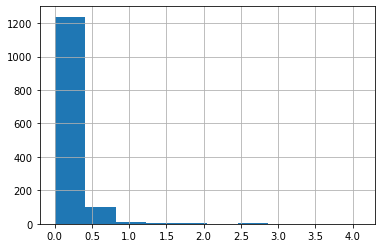

In [76]:
df['distance_to_subway'].hist()

In [77]:
df.loc[df['distance_to_subway'] >= .585, 'dist_dummy'] = 1
df.loc[df['distance_to_subway'] < .585, 'dist_dummy'] = 0

In [78]:
df['dist_dummy'].value_counts()

0.0    1306
1.0      54
Name: dist_dummy, dtype: int64

In [79]:
pd.crosstab(df['dist_dummy'],df['permanently closed'])

permanently closed,0,1
dist_dummy,,
0.0,1123,183
1.0,50,4


In [80]:
a = df.loc[df['permanently closed'] == 0, 'distance_to_subway']
b = df.loc[df['permanently closed'] == 1, 'distance_to_subway']

print(df.groupby(df['permanently closed'])['distance_to_subway'].mean())

sp.ttest_ind(a,b)

permanently closed
0    0.224173
1    0.209185
Name: distance_to_subway, dtype: float64


Ttest_indResult(statistic=0.8101285932096137, pvalue=0.41800820800186855)

In [81]:
a = df.loc[df['permanently closed'] == 0, 'distance_to_subway']
b = df.loc[df['permanently closed'] == 1, 'distance_to_subway']

print(df.groupby(df['permanently closed'])['distance_to_subway'].median())

sp.mannwhitneyu(a,b)

permanently closed
0    0.177795
1    0.159626
Name: distance_to_subway, dtype: float64


MannwhitneyuResult(statistic=98722.0, pvalue=0.014047327837692155)

In [82]:
a = df.loc[df['dist_dummy'] == 0, 'total_restaurants_in_zip']
b = df.loc[df['dist_dummy'] == 1, 'total_restaurants_in_zip']

print(df.groupby(df['dist_dummy'])['total_restaurants_in_zip'].mean())

sp.ttest_ind(a,b)

dist_dummy
0.0    311.581930
1.0    181.333333
Name: total_restaurants_in_zip, dtype: float64


Ttest_indResult(statistic=5.352950185970986, pvalue=1.0148042492934367e-07)

In [83]:
a = df.loc[df['dist_dummy'] == 0, :]
b = df.loc[df['dist_dummy'] == 1, :]

print(a.groupby(a['permanently closed'])['total_restaurants_in_zip'].mean())
print(b.groupby(b['permanently closed'])['total_restaurants_in_zip'].mean())

permanently closed
0    295.783615
1    408.530055
Name: total_restaurants_in_zip, dtype: float64
permanently closed
0    184.66
1    139.75
Name: total_restaurants_in_zip, dtype: float64


Find an interaction between distance from the subway and total restaurants in the zip such that the direction of the relationship inverts across levels of distance.  Below .585 closed restaurants were in zips with a higher avg number of restaurants.  Above .585 closed restaurants were in zips with a lower avg number of restaurants.

## Figures

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 25 columns):
Unnamed: 0                  1360 non-null int64
alias                       1360 non-null object
categories                  1360 non-null object
coordinates                 1360 non-null object
is_closed                   1360 non-null bool
location                    1360 non-null object
name                        1360 non-null object
rating                      1360 non-null float64
review_count                1360 non-null int64
transactions                1360 non-null object
url                         1360 non-null object
permanently closed          1360 non-null int64
outdoor_seating             1360 non-null int64
price_cat                   1360 non-null object
delivery                    1360 non-null int64
restaurant_reservation      1360 non-null int64
pickup                      1360 non-null int64
zip_code                    1360 non-null int64
latitude            

## Proportion closing by restaurant characteristics

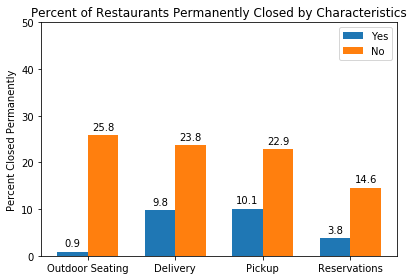

<Figure size 432x288 with 0 Axes>

In [124]:
labels = ['Outdoor Seating', 'Delivery', 'Pickup','Reservations']
Yes_means = [0.9, 9.8, 10.1,3.8]
No_means = [25.8, 23.8, 22.9,14.6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Yes_means, width, label='Yes')
rects2 = ax.bar(x + width/2, No_means, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Closed Permanently')
ax.set_title('Percent of Restaurants Permanently Closed by Characteristics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set(ylim=(0, 50))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
plt.savefig('closures by characteristics.png')

## Means of continuous variables by closure yes/no

In [104]:
print(df.groupby(df['permanently closed'])['total_restaurants_in_zip'].mean())
print(df.groupby(df['permanently closed'])['distance_to_subway'].mean())
print(df.groupby(df['permanently closed'])['Population Density'].mean())

permanently closed
0    291.046888
1    402.780749
Name: total_restaurants_in_zip, dtype: float64
permanently closed
0    0.224173
1    0.209185
Name: distance_to_subway, dtype: float64
permanently closed
0    60216.293521
1    66968.684492
Name: Population Density, dtype: float64


Scale is too different to put on same axis

In [107]:
restden_dict = {'Closed': ['Open', 'Closed'], 'Mean Rest Density': [291,402.8]}
restden_df = pd.DataFrame(data=restden_dict)
subwaydist_dict = {'Closed': ['Open', 'Closed'], 'Mean Distace to subway': [0.224,0.209]}
subwaydist_df = pd.DataFrame(data=subwaydist_dict)
popden_dict = {'Closed': ['Open', 'Closed'], 'Mean Pop Density': [60216.3,66968.7]}
popden_df = pd.DataFrame(data=popden_dict)

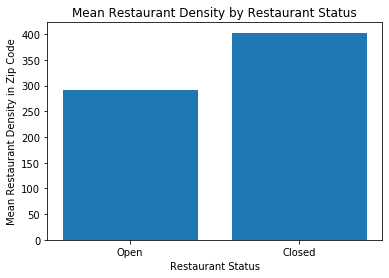

In [122]:
plt.bar(data=restden_df, x='Closed', height='Mean Rest Density')
plt.xlabel('Restaurant Status')
plt.ylabel('Mean Restaurant Density in Zip Code')
# plt.ylim(0,50)
plt.title('Mean Restaurant Density by Restaurant Status')
plt.savefig('Mean restaurant density by status.png')

Text(0.5, 1.0, 'Mean Population Density by Restaurant Status')

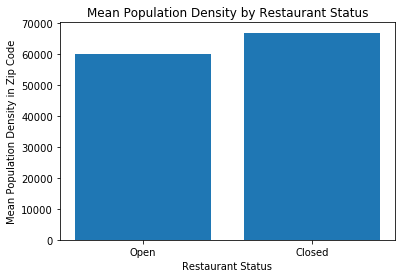

In [109]:
plt.bar(data=popden_df, x='Closed', height='Mean Pop Density')
plt.xlabel('Restaurant Status')
plt.ylabel('Mean Population Density in Zip Code')
# plt.ylim(0,50)
plt.title('Mean Population Density by Restaurant Status')

Text(0.5, 1.0, 'Mean Distance to Nearest Subway by Restaurant Status')

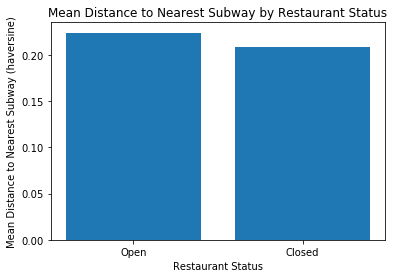

In [110]:
plt.bar(data=subwaydist_df, x='Closed', height='Mean Distace to subway')
plt.xlabel('Restaurant Status')
plt.ylabel('Mean Distance to Nearest Subway (haversine)')
# plt.ylim(0,50)
plt.title('Mean Distance to Nearest Subway by Restaurant Status')

## Number of transactions

In [85]:
df['num_transaction'].value_counts()

2    872
0    353
3     88
1     47
Name: num_transaction, dtype: int64

In [86]:
pd.crosstab(df['num_transaction'],df['permanently closed']).apply(lambda x:x/x.sum(),axis=1)

permanently closed,0,1
num_transaction,,
0,0.750708,0.249292
1,0.936170,0.063830
2,0.893349,0.106651
3,0.965909,0.034091


In [116]:
data_dict = {'Number of Transactions': ['Zero', 'One', 'Two', 'Three'], 'Proportion Closed': [24.9, 6.4, 10.7, 3.4]}

In [117]:
data_df = pd.DataFrame(data=data_dict)
data_df

,Number of Transactions,Proportion Closed
0,Zero,24.9
1,One,6.4
2,Two,10.7
3,Three,3.4


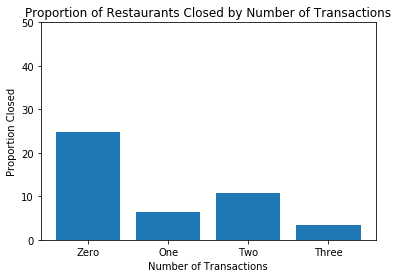

In [121]:
plt.bar(data=data_df, x='Number of Transactions', height='Proportion Closed')
plt.xlabel('Number of Transactions')
plt.ylabel('Proportion Closed')
plt.ylim(0,50)
plt.title('Proportion of Restaurants Closed by Number of Transactions')
plt.savefig('closures by number of transactions.png')

## Rating

In [72]:
pd.crosstab(df['rating2'],df['permanently closed']).apply(lambda x:x/x.sum(),axis=1)

permanently closed,0,1
rating2,,
3.0,0.666667,0.333333
3.5,0.624113,0.375887
4.0,0.865906,0.134094
4.5,0.933333,0.066667
5.0,0.957746,0.042254


In [97]:
data_dict = {'Rating': ['3 or less', '3.5', '4', '4.5','5'], 'Proportion Closed': [33.3, 37.6, 13.4, 6.7,4.2]}
data_df = pd.DataFrame(data=data_dict)
data_df

,Rating,Proportion Closed
0,3 or less,33.3
1,3.5,37.6
2,4,13.4
3,4.5,6.7
4,5,4.2


Text(0.5, 1.0, 'Proportion of Restaurants Closed by Rating')

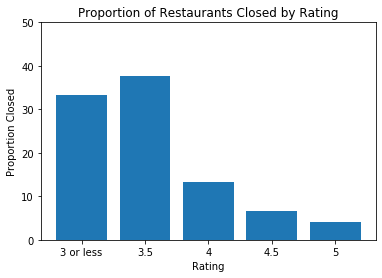

In [98]:
plt.bar(data=data_df, x='Rating', height='Proportion Closed')
plt.xlabel('Rating')
plt.ylabel('Proportion Closed')
plt.ylim(0,50)
plt.title('Proportion of Restaurants Closed by Rating')

## Price point

In [99]:
pd.crosstab(df['price_cat'],df['permanently closed']).apply(lambda x:x/x.sum(),axis=1)

permanently closed,0,1
price_cat,,
four,0.833333,0.166667
missing,0.939655,0.060345
one,0.811024,0.188976
three,0.823077,0.176923
two,0.855803,0.144197


In [100]:
data_dict = {'Price': ['Missing', 'One', 'Two', 'Three','Four'], 'Proportion Closed': [6.0, 18.9, 14.4, 17.7,16.7]}
data_df = pd.DataFrame(data=data_dict)
data_df

,Price,Proportion Closed
0,Missing,6.0
1,One,18.9
2,Two,14.4
3,Three,17.7
4,Four,16.7


Text(0.5, 1.0, 'Proportion of Restaurants Closed by Price')

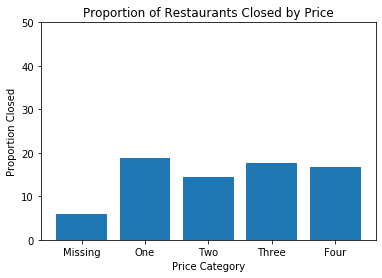

In [101]:
plt.bar(data=data_df, x='Price', height='Proportion Closed')
plt.xlabel('Price Category')
plt.ylabel('Proportion Closed')
plt.ylim(0,50)
plt.title('Proportion of Restaurants Closed by Price')